<p style="text-align: center; font-size: 400%">Devoir MTH2302D </p>

<p style="text-align: center; font-size: 120%">Julien Roux 2060886  
- Sébastien Roy 2146331</p>

#### Option génerale pour les graphiques

In [83]:
options(repr.plot.width = 10, repr.plot.height=10, repr.plot.xlab.size=2, repr.plot.ylab.size=2)

### Phase 1

On charge les données depuis le csv en fonction du matricule.

In [84]:
matricule <- 2060886

In [85]:
charger <- function(matricule) {
  set.seed(matricule)
  mondata <- read.csv2("DevoirDH23.csv")[sample(290,195),-1]
}

In [86]:
mondataa <- charger(matricule)
mondata[1:5,]

,Sales,Price,Advertising,Region
,<dbl>,<int>,<int>,<int>
25,5.58,148,10,1
181,12.61,104,10,0
202,9.48,132,10,0
129,5.87,109,0,1
289,3.02,90,11,0


On charge toutes les données depuis le csv.

In [87]:
alldata <- read.csv2("DevoirDH23.csv")
alldata[1:5,]

,NUM,Sales,Price,Advertising,Region
,<int>,<dbl>,<int>,<int>,<int>
1,142,5.40,163,13,0
2,104,7.99,99,0,1
3,103,4.21,137,14,0
4,274,4.34,111,0,0
5,286,6.42,126,5,1


### a)

In [88]:
Ventes <- alldata$Sales
# Ventes[1:100]

#### Histogramme du nombre de ventes de siège automobiles

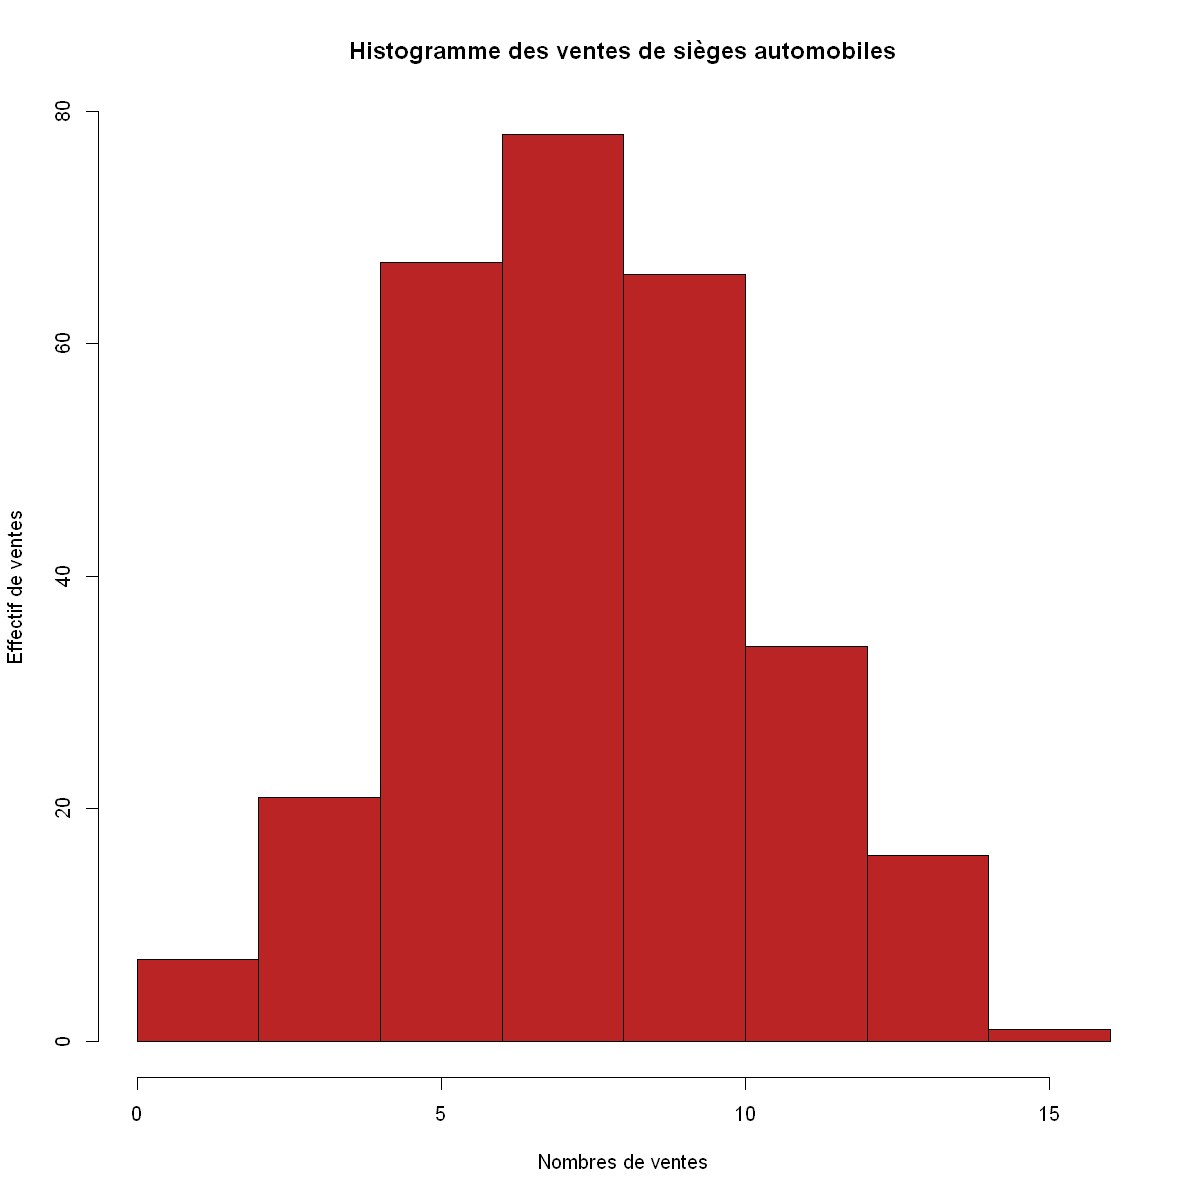

In [89]:
hist(Ventes, col="#bb2424",main="Histogramme des ventes de sièges automobiles",
     border="#000000", xlab="Nombres de ventes",ylab="Effectif de ventes")

Ce graphique montre que la majorité des points de vente ont vendu entre 5 et 10 sièges automobiles.  
<br><br>

#### Box plot du nombre de ventes de siège automobiles

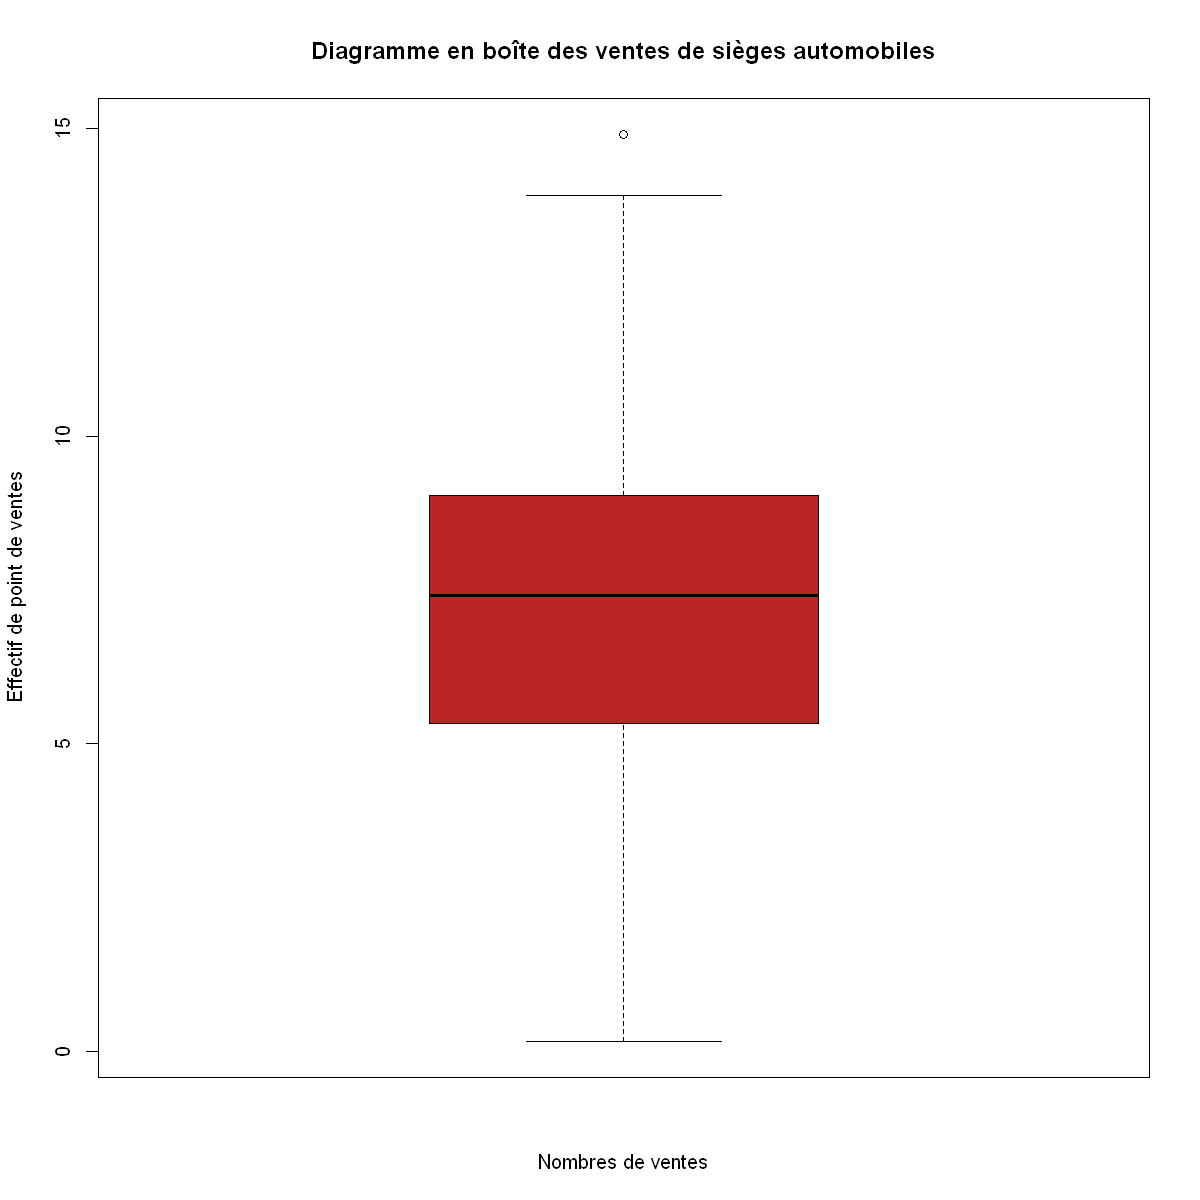

In [90]:
boxplot(Ventes, col="#bb2424",main="Diagramme en boîte des ventes de sièges automobiles",
        border="#000000", xlab="Nombres de ventes",ylab="Effectif de point de ventes")

Ce graphique montre que la moiter des points de vente ont vendu entre 5 et 10 sièges automobiles et que la médiane est d'environ 7,5.  
<br><br>

#### Droite de Henry du nombre de ventes de siège automobiles

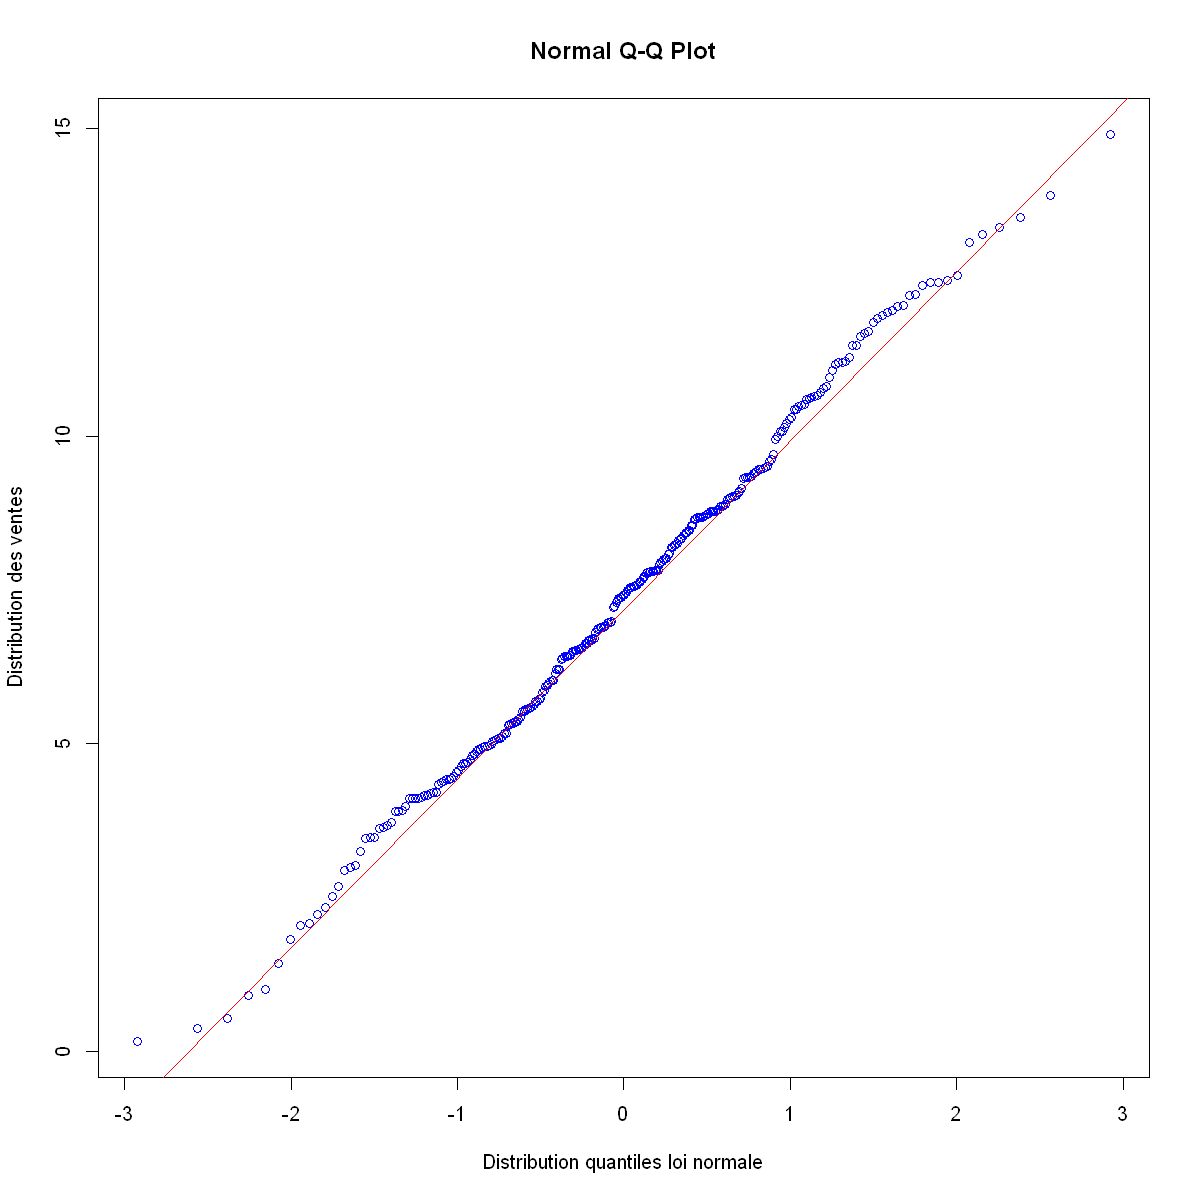

In [91]:
qqnorm(Ventes,col="blue", xlab="Distribution quantiles loi normale",ylab="Distribution des ventes")
qqline(Ventes,col="red")

Les données de ventes semblent suivre une droite de Henry. On peut alors dire que la loi normale est une bonne approximation de la distribution des ventes de sièges automobiles.  
<br><br>

#### Test de normalité du nombre de ventes de siège automobiles

$H_0$: Les données suivent une loi normale  
$H_1$: Les données ne suivent pas une loi normale  

In [92]:
shapiro.test(Ventes)


	Shapiro-Wilk normality test

data:  Ventes
W = 0.99571, p-value = 0.6102


Comme W = 0.99568 n'est pas petit et que p-value = 0.6051 n'est pas petit, on ne rejette pas $H_0$.  
Ainsi le test de normalité montre que les données suivent une loi normale.
<br>
<br>

#### Tableau de statistiques descriptives du nombre de ventes de siège automobiles

Utilisation d'une librarie de R pour le calcule de l'intervalle de confiance à 95% pour la moyenne.

In [93]:
# install.packages("devtools") ; require(devtools)
# devtools::install_github("Antoine-Masse/KefiR")
library(KefiR)
cat('La marge d\'erreur est ', int.pop(Ventes, 0.95))

La marge d'erreur est  0.3186124

Caclule de l'intervalle de confiance à 95% pour la moyenne détailé.

In [94]:
cat('La moyenne des ventes est :', mean(Ventes))
cat('\nLa variance des ventes est :', var(Ventes))
cat('\nTaille de la population : n =', length(Ventes))

La moyenne des ventes est : 7.346793
La variance des ventes est : 7.663499
Taille de la population : n = 290

Calcul intervale de confiance à 95% (1 - $\alpha$ = 0.95) pour la moyenne de la population.  
$\bar{X}$ = 7.343 et $\sigma^2$ = 7.71, de plus Ventes ~ N($\mu$, $\sigma^2$).  
On a donc: $\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ ~ N(0, 1) soit $\mu \in \bar{X} \pm z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$  
<br> 
Calcul $z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$

In [95]:
z <- qnorm(0.025, 0, 1, lower.tail = FALSE) * sqrt(var(Ventes)/length(Ventes))
cat('\nLa marge d\'erreur est :', z)



La marge d'erreur est : 0.3186124

On à donc: $\mu \in \bar{X} \pm 0.3195956$ soit $\mu \in [7.023404, 7.662596]$ à 95%.    
<br>
<br>

Tableau de statistiques :

In [96]:
stat <- matrix(c(
    summary(Ventes)[['1st Qu.']],
    summary(Ventes)[['Median']],
    summary(Ventes)[['Mean']],
    sqrt(var(Ventes)),
    summary(Ventes)[['3rd Qu.']],
    paste("[", 7.023404, ", ",  7.662596, "]", sep = "")),
    ncol=6,
    nrow=1,
    byrow=TRUE)

colnames(stat) <- c('1er Quartile','Médiane','Moyenne','Écart type', '3e Quartile', 'Intervale de confiance')
stat

1er Quartile,Médiane,Moyenne,Écart type,3e Quartile,Intervale de confiance
5.3225,7.415,7.34679310344828,2.76830261510739,9.025,"[7.023404, 7.662596]"


### b)

#### On extrait les données de ventes de sièges automobiles pour chaque région

In [97]:
ventesRegion1 <- mondata[mondata$Region == 0,]$Sales
ventesRegion2 <- mondata[mondata$Region == 1,]$Sales
ventesRegion1[1:5]
ventesRegion2[1:5]

[1] 12.61  9.48  3.02 11.19  7.64

[1] 5.58 5.87 9.50 7.23 4.42

#### On crée un nouveau dataframe avec les données de ventes de sièges automobiles avec une colonne pour différencier les régions.

In [98]:
combineSales <- rbind(
    data.frame(
        Region = "Region 1",
        Ventes = ventesRegion1
    ),
    data.frame(
        Region = "Region 2",
        Ventes = ventesRegion2
    )
)
combineSales[1:5,]

,Region,Ventes
,<chr>,<dbl>
1,Region 1,12.61
2,Region 1,9.48
3,Region 1,3.02
4,Region 1,11.19
5,Region 1,7.64


#### Histogramme du nombre de ventes de siège automobiles par point de vente en fonction de la région

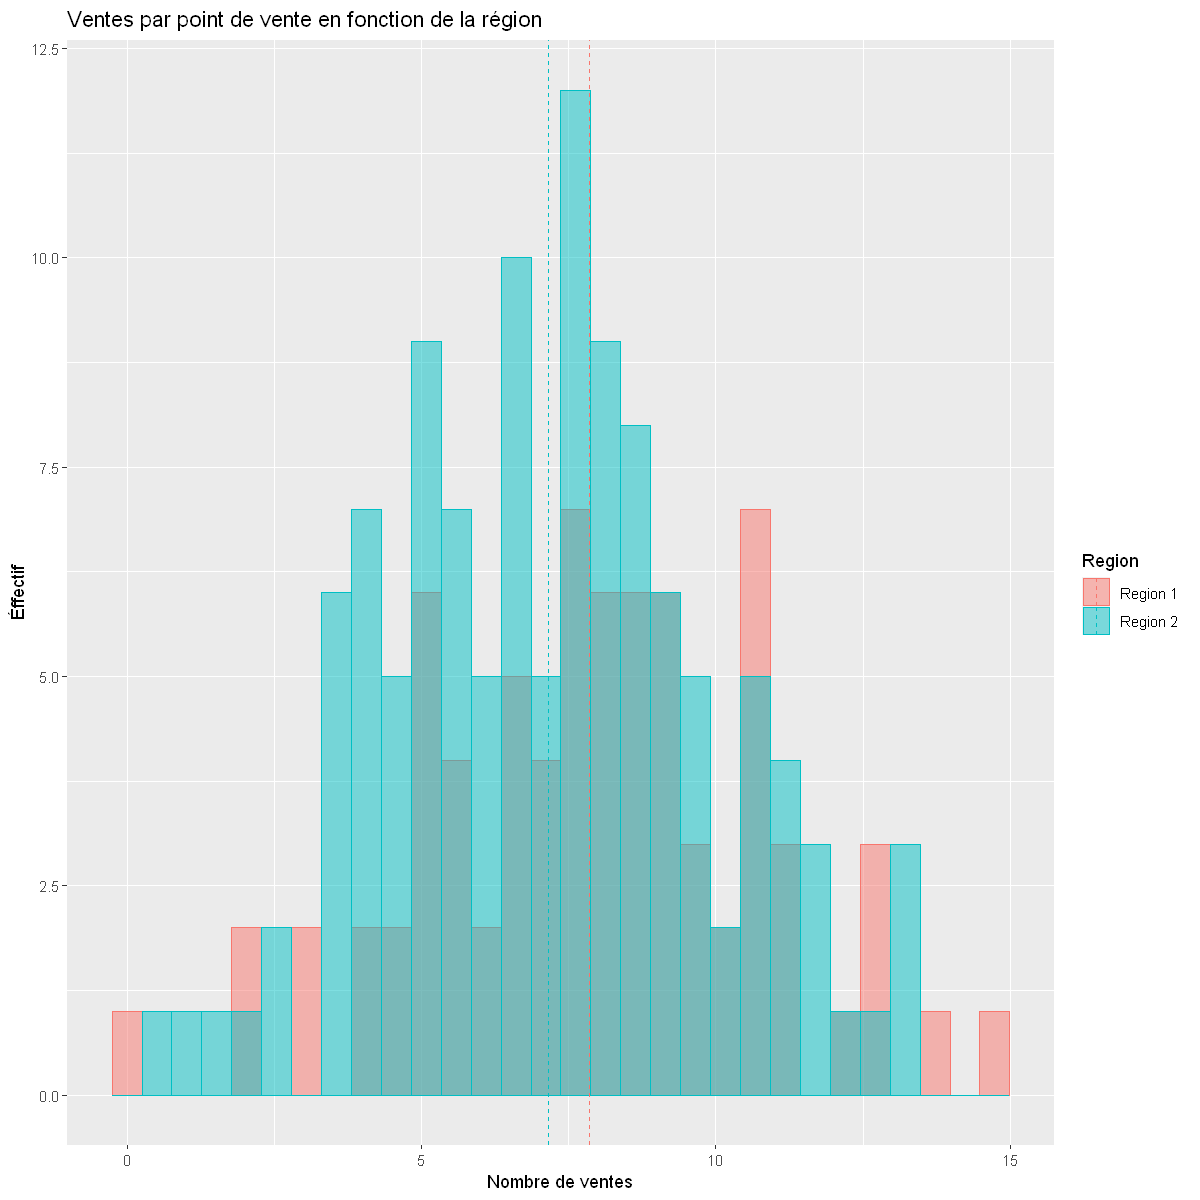

In [99]:
library(ggplot2)

hist <- ggplot(combineSales, aes(x=Ventes, fill=Region, color=Region)) +
  geom_histogram(bins = 30, alpha=0.5, position="identity") +
  labs(title="Ventes par point de vente en fonction de la région",x="Nombre de ventes", y = "Éffectif")

moy <- data.frame(
    grp.mean = c(mean(ventesRegion1), mean(ventesRegion2)),
    Region = c("Region 1", "Region 2")
)
hist+geom_vline(data=moy, aes(xintercept=grp.mean, color=Region),
             linetype="dashed")

#### Box plot du nombre de ventes de siège automobiles en fonction de la région

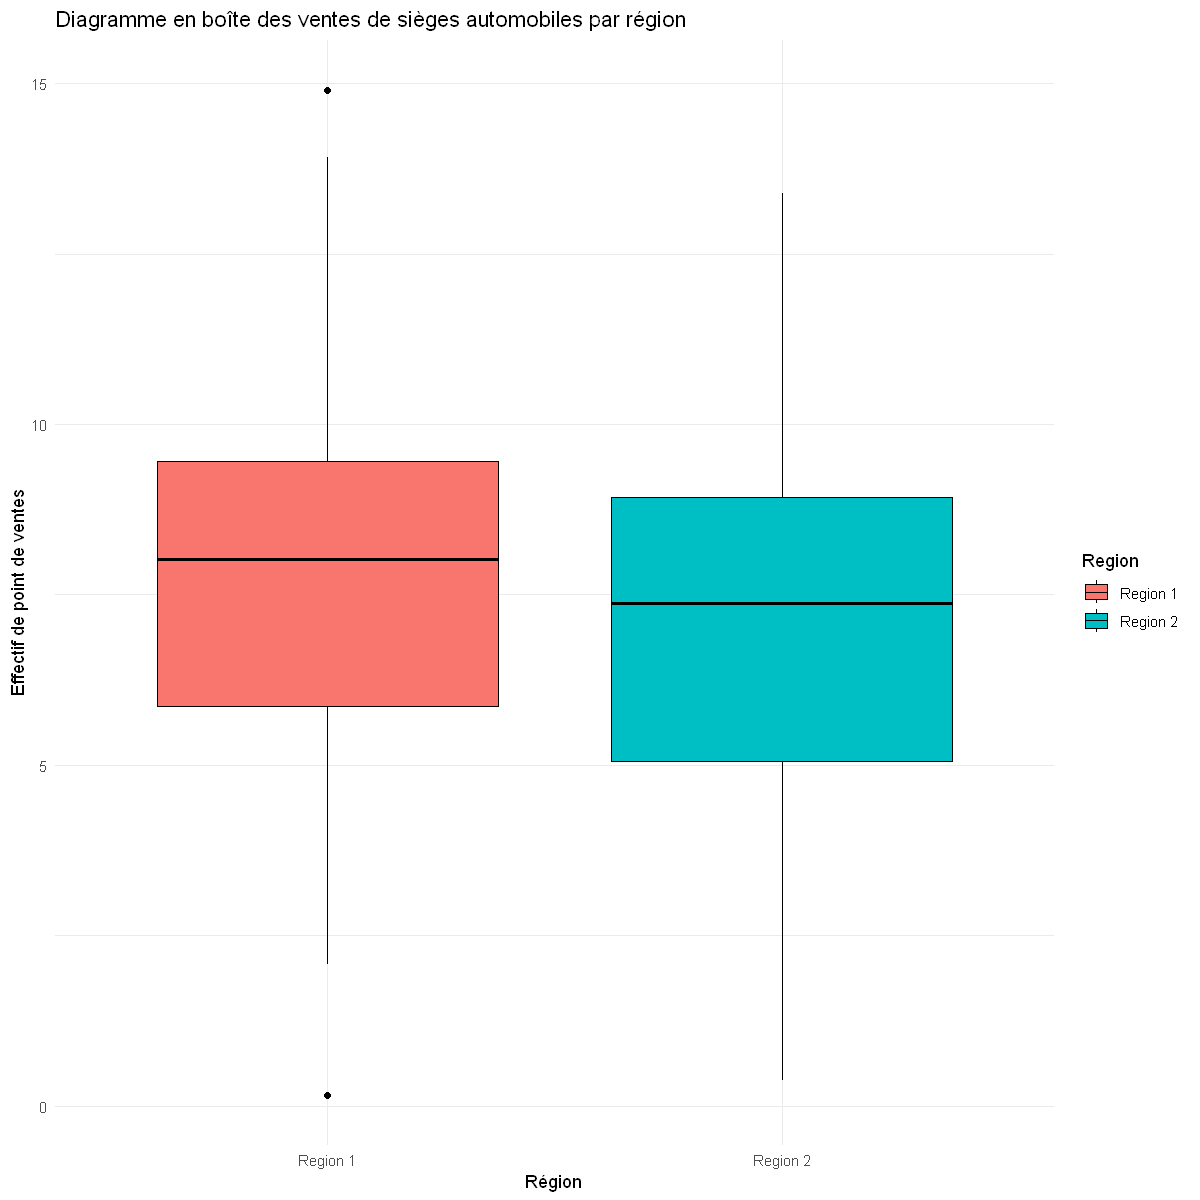

In [100]:
ggplot(combineSales, aes(x=Region, y=Ventes)) +
    geom_boxplot(aes(fill=Region), color="black") +
    theme_minimal() +
    labs(title="Diagramme en boîte des ventes de sièges automobiles par région",
         x="Région", y="Effectif de point de ventes")

#### Tableau de statistiques descriptives du nombre de ventes pas point de vente en fonction de la région

In [101]:
statRegion <- matrix(c(
    0,
    summary(ventesRegion1)[['1st Qu.']],
    summary(ventesRegion1)[['Median']],
    summary(ventesRegion1)[['Mean']],
    sqrt(var(ventesRegion1)),
    summary(ventesRegion1)[['3rd Qu.']],
    paste("[", round(summary(ventesRegion1)[['Mean']] - int.pop(ventesRegion1, 0.95), 3), ", ",  round(summary(ventesRegion1)[['Mean']] + int.pop(ventesRegion1, 0.95), 3), "]", sep = ""),
    
    1,
    summary(ventesRegion2)[['1st Qu.']],
    summary(ventesRegion2)[['Median']],
    summary(ventesRegion2)[['Mean']],
    sqrt(var(ventesRegion2)),
    summary(ventesRegion2)[['3rd Qu.']],
    paste("[", round(summary(ventesRegion2)[['Mean']] - int.pop(ventesRegion2, 0.95), 3), ", ",  round(summary(ventesRegion2)[['Mean']] + int.pop(ventesRegion2, 0.95), 3), "]", sep = "")),
    ncol=7,
    nrow=2,
    byrow=TRUE)

colnames(statRegion) <- c('Région','1er Quartile','Médiane','Moyenne','Écart type', '3e Quartile', 'Intervale de confiance')

statRegion

Région,1er Quartile,Médiane,Moyenne,Écart type,3e Quartile,Intervale de confiance
0,5.8675,8.02,7.85736842105263,2.82292726009536,9.4575,"[7.223, 8.492]"
1,5.06,7.37,7.14941176470588,2.74392558520608,8.935,"[6.656, 7.642]"


# TODO : INTERPRÉTATION

### Test d'hypotheses sur la variance des deux régions

$H_0$ : $\sigma_1^2 = \sigma_2^2$  
$H_1$ : $\sigma_1^2 \neq \sigma_2^2$

In [153]:
varTest <- var.test(Ventes ~ Region , data=alldata, alternative = "two.sided", paired = FALSE)
varTest
cat('La p-value est :', varTest$p.value)


	F test to compare two variances

data:  Ventes by Region
F = 1.0215, num df = 117, denom df = 171, p-value = 0.8919
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7353614 1.4340909
sample estimates:
ratio of variances 
          1.021504 


La p-value est : 0.891923

Comme p-value = 0.891923 > $\alpha = 0.05$, on ne rejette pas $H_0$ donc le test sur les variances montre que les deux régions ont des variances que ne diffèrent pas significativement au seuil $\alpha$ = 5%.	

#### Démarche détaillée : 

In [103]:
varRegion1 = var(ventesRegion1)
varRegion2 = var(ventesRegion2)
n1 = length(ventesRegion1)
n2 = length(ventesRegion2)

$H_0$ : $\sigma_1^2 = \sigma_2^2$  
$H_1$ : $\sigma_1^2 \neq \sigma_2^2$  
$f_0$ : $\frac{s_1^2}{s_2^2}$

On rejete $H_0$ si $F_{1-\frac{\alpha}{2}},n_1 - 1, n_2 - 1 > f_0$  ou $F_{\frac{\alpha}{2}},n_1 - 1, n_2 - 1 < f_0$

In [104]:
f0 = varRegion1/varRegion2
f0

[1] 1.058412

 $F_{1-\frac{\alpha}{2}},n_1 - 1, n_2 - 1$ = 0.71 < $f_0$ = 1.021, On ne peut conclure pour l'insant.

In [105]:
Fg = qf(1 - 0.025, n1 - 1, n2 - 1, lower.tail = FALSE)
Fg

[1] 0.656038

$F_{\frac{\alpha}{2}},n_1 - 1, n_2 - 1 $  = 1.389 > $f_0$ = 1.021, Les critères de rejet ne sont pas respectés donc $H_0$ est accepté.

In [106]:
Fd = qf(0.025, n1 - 1, n2 - 1, lower.tail = FALSE)
Fd

[1] 1.495428

### Test d'hypotheses sur l'égalité des moyennes des deux régions

$H_0$ : $\mu_1 = \mu_2$  
$H_1$ : $\mu_1 \neq \mu_2$

In [155]:
moyTest <- t.test(Ventes ~ Region , data=alldata, alternative = "two.sided", paired = FALSE)
moyTest


	Welch Two Sample t-test

data:  Ventes by Region
t = 1.146, df = 249.83, p-value = 0.2529
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.2728957  1.0324287
sample estimates:
mean in group 0 mean in group 1 
       7.572034        7.192267 


Comme p-value = 0.2529 > $\alpha = 0.05$, on ne rejette pas $H_0$ donc le test sur les moyennes montre que les deux régions ont des moyennes que ne diffèrent pas significativement au seuil $\alpha$ = 5%.	
<br>
<br>
<br>


## Phase 2 : Recherche du meilleur modèle

### c)

#### Modèle 1 --- $Y = \beta_0 +\beta_1 X_1 + \epsilon$

In [160]:
price <- mondata$Price
sales <- mondata$Sales

linModel1 <- lm(sales ~ price)
summaryLinModel1 <- summary(linModel1)

Tableau coefficient de regression


In [161]:
summaryLinModel1$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),13.99532506,0.990598399,14.128152,1.389760e-31
price,-0.05719668,0.008480086,-6.744823,1.735095e-10


Tableau analyse de variance 


In [162]:
anova(linModel1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
price,1,287.9098,287.909849,45.49264,1.735095e-10
Residuals,193,1221.4416,6.328713,NA,NA



Tester la signification du modèle

In [163]:
summaryLinModel1


Call:
lm(formula = sales ~ price)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3981 -1.8418 -0.0021  1.5515  7.0590 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.99532    0.99060  14.128  < 2e-16 ***
price       -0.05720    0.00848  -6.745 1.74e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.516 on 193 degrees of freedom
Multiple R-squared:  0.1908,	Adjusted R-squared:  0.1866 
F-statistic: 45.49 on 1 and 193 DF,  p-value: 1.735e-10


Nuage de point du modèle 1

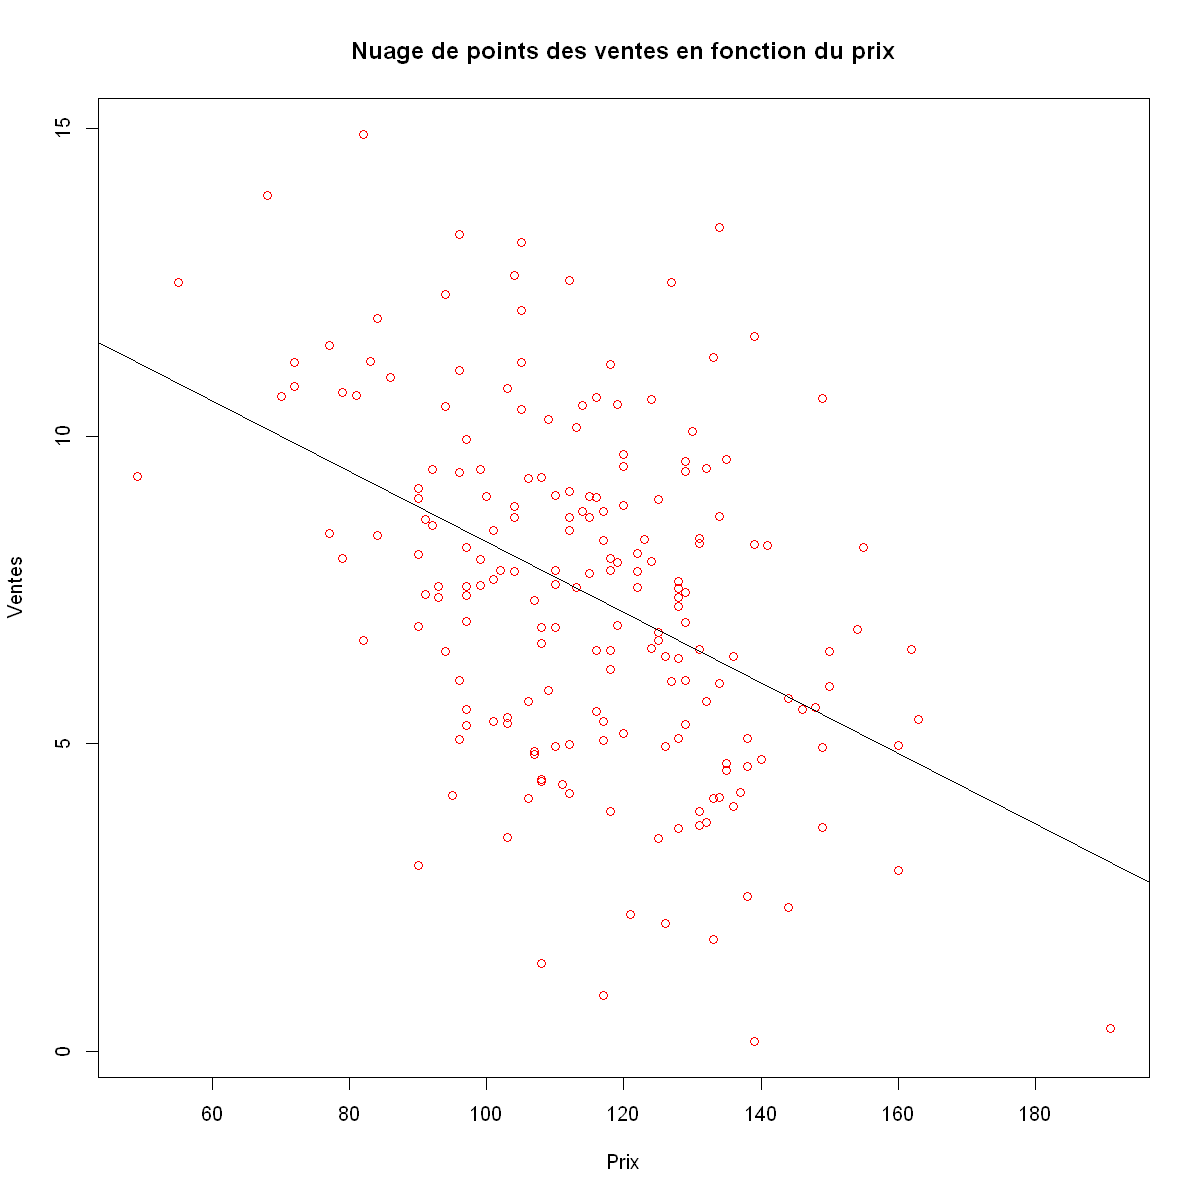

In [164]:
plot(mondata$Price, mondata$Sales, main="Nuage de points des ventes en fonction du prix", xlab="Prix", ylab="Ventes", col="#ff0000")
abline(linModel1)

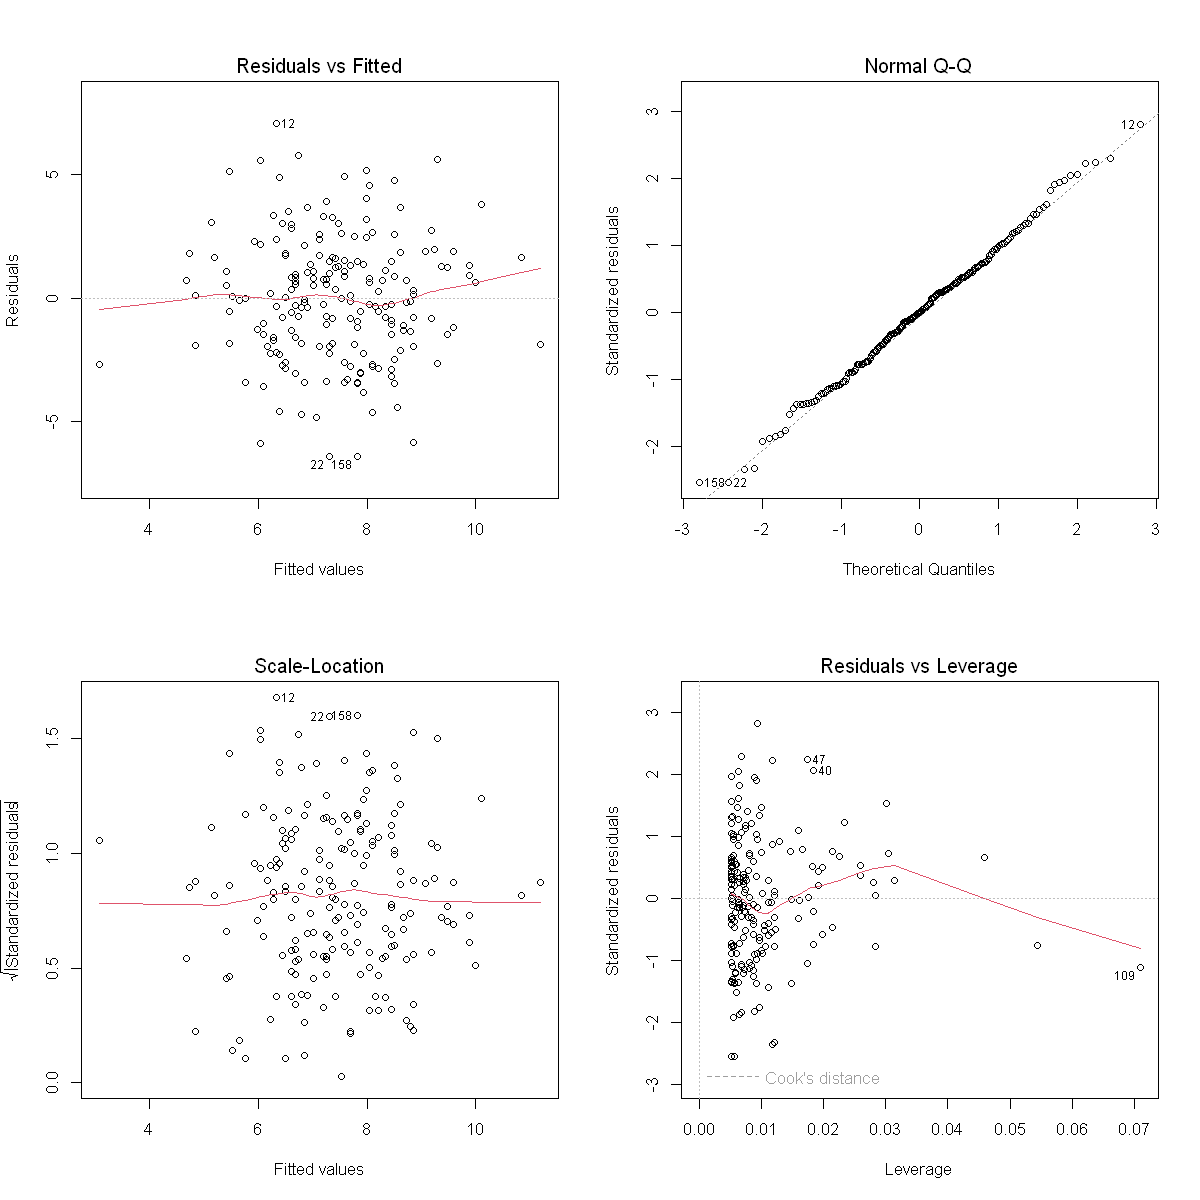

In [165]:
par(mfrow = c(2,2)) 
plot(linModel1)

__Test significativité du modèle 1 :__    
Hypothèse $H_0 : \beta_1 = 0$ et $H_1 : \beta_1 \neq 0$  
On a p-value = 1.735e-10 < $\alpha = 0.05$ On rejete $H_0$  
On à donc que le modèle est significatif au seuil $\alpha = 5$%

__Évaluation validité du modèle 1  :__    
Le modèle n'est pas très valide car R² = 0.1908 or plus R² est proche de 1, plus la variabilité des valeurs est expliqué par le modèle. 

__Analyse des résidus du modèle 1 :__  
- Les résidus suivent la droite de normalité, l'hypothèse de normalité est donc respectée. 
- Les résidus sont répartis de façon homogène autour de 0 dans l'intervalle [4, 10] et on a une homoscédasticité des valeurs qui est valide.
- le modèle à trois point atipiques qui peuvent fausser le modèle. On peut les supprimer pour améliorer le modèle.

Intervale de confiance $\beta_0$ et $\beta_1$ :

In [166]:
confint(linModel1)

,2.5 %,97.5 %
(Intercept),12.04153646,15.94911366
price,-0.07392222,-0.04047114


À 95% on a $\beta_0 \in [12.12653560, 15.0994715]$ et $\beta_1 \in [-0.06686684, -0.0416163]$.  
<br>
<br>


#### Modèle 2 --- $Y = \beta_0 X_1^{\beta_1} e^{\epsilon}$  
Équation transformée : $ln(Y) = ln(\beta_0) + \beta_1 ln(X_1) + \epsilon$


In [167]:
linModel2 <- lm(log(mondata$Sales) ~ log(mondata$Price))
summaryLinModel2 <- summary(linModel2)

Tableau coefficient de regression


In [168]:
summaryLinModel2$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),7.027436,0.8776213,8.007368,1.076999e-13
log(mondata$Price),-1.084843,0.1855614,-5.846276,2.112914e-08


Tableau analyse de variance

In [169]:
anova(linModel2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mondata$Price),1,8.807513,8.8075133,34.17895,2.112914e-08
Residuals,193,49.733834,0.2576883,NA,NA


Tester la signification du modèle

In [170]:
summaryLinModel2


Call:
lm(formula = log(mondata$Sales) ~ log(mondata$Price))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5069 -0.1872  0.0839  0.2781  0.8805 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7.0274     0.8776   8.007 1.08e-13 ***
log(mondata$Price)  -1.0848     0.1856  -5.846 2.11e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5076 on 193 degrees of freedom
Multiple R-squared:  0.1504,	Adjusted R-squared:  0.146 
F-statistic: 34.18 on 1 and 193 DF,  p-value: 2.113e-08


Nuage de point du modèle 2

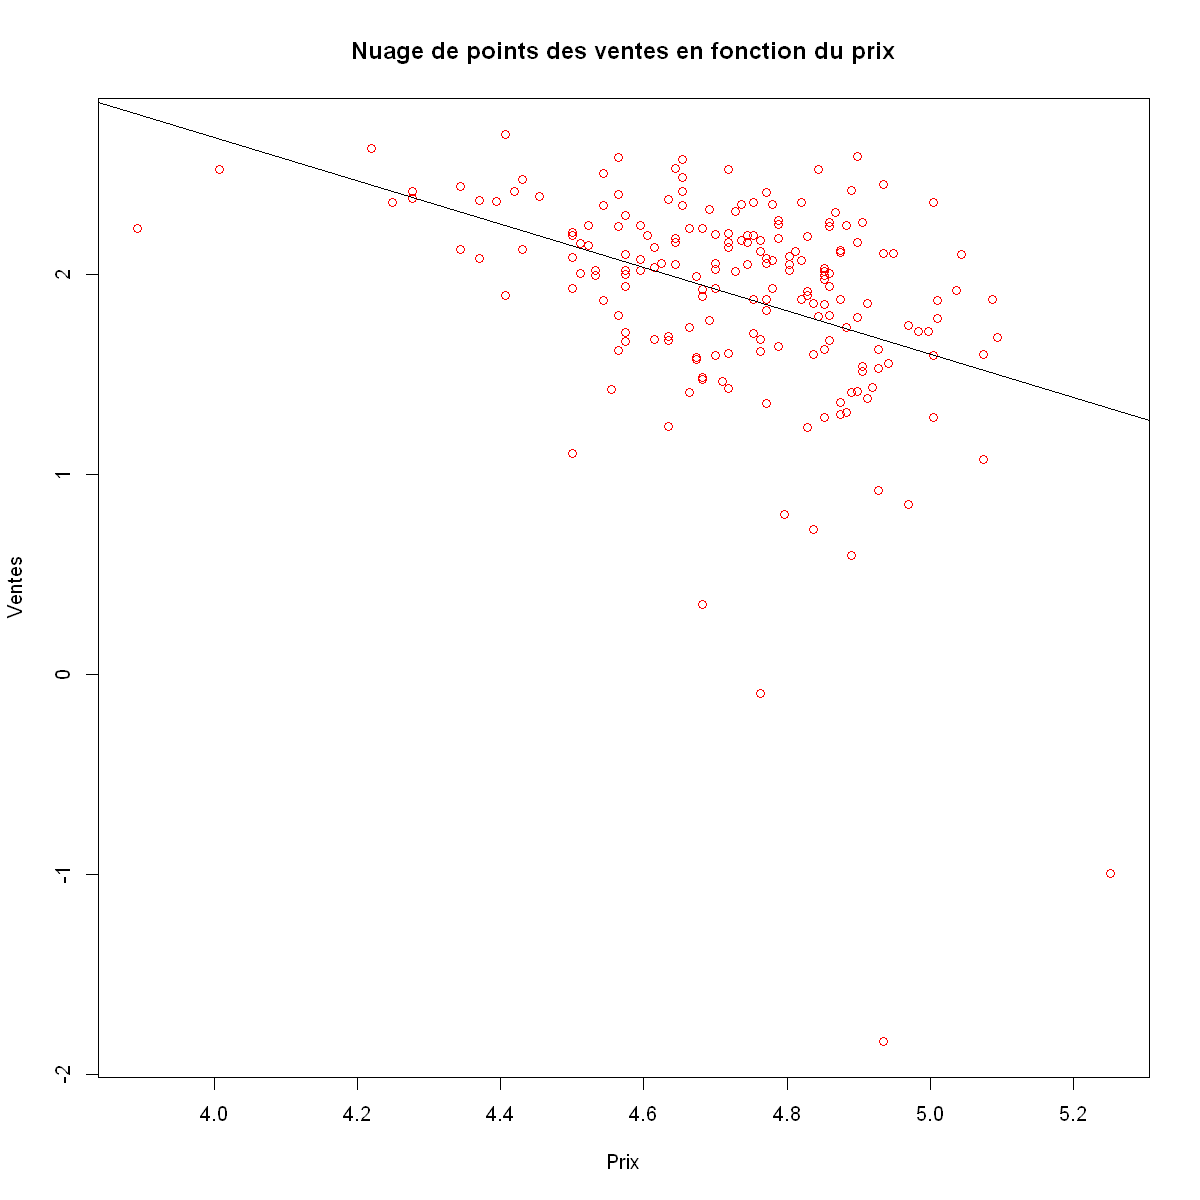

In [171]:
plot(log(mondata$Price), log(mondata$Sales), main="Nuage de points des ventes en fonction du prix", xlab="Prix", ylab="Ventes", col="#ff0000")
abline(linModel2)

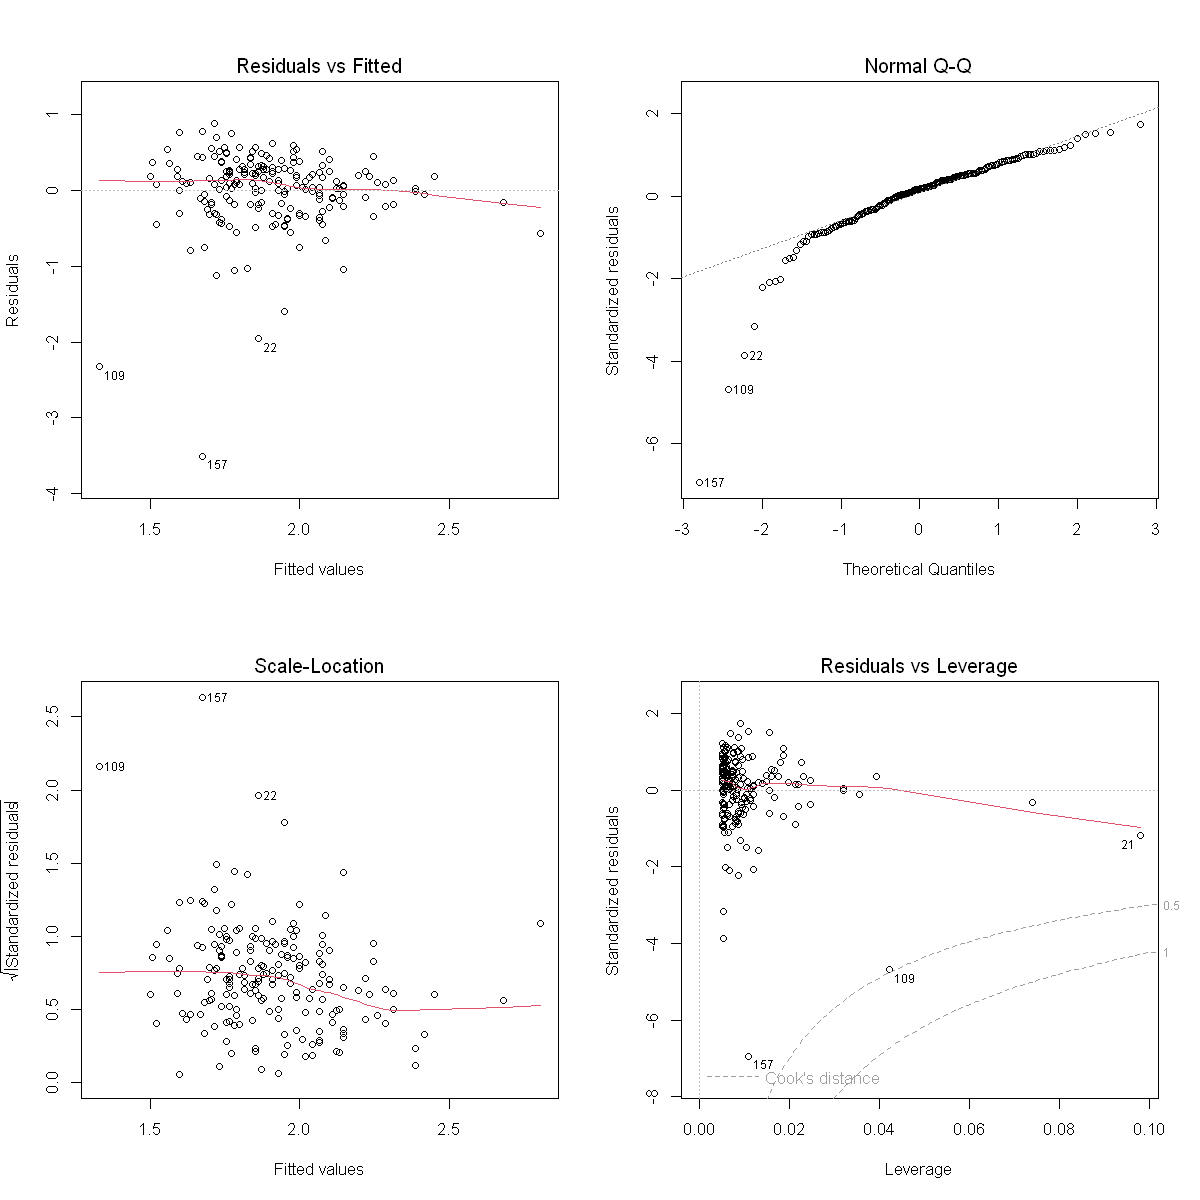

In [172]:
par(mfrow = c(2,2))
plot(linModel2)

__Test significativité du modèle 1 :__    
Hypothèse $H_0 : \beta_1 = 0$ et $H_1 : \beta_1 \neq 0$  
On a p-value = 2.113e-08 < $\alpha = 0.05$ On rejete $H_0$  
On à donc que le modèle est significatif au seuil $\alpha = 5$%

__Évaluation validité du modèle 1  :__    
Le modèle n'est pas très valide car R² = 0.1504 où plus R² est proche de 1, plus la variabilité des valeurs est expliqué par le modèle.  

__Analyse des résidus du modèle 1 :__  
- Les résidus suivent assez bien la droite de normalité, l'hypothèse de normalité est donc respectée. 
- Les résidus sont répartis de façon homogène autour de la droite dans l'intervalle [1.5, 2.5] 
- L'homoscédasticité des valeurs n'est très bonne car on observe une forme d'entonnoire vers la fin de l'intervalle
- le modèle à trois point atipiques qui peuvent fausser le modèle. On peut les supprimer pour améliorer le modèle.


Intervale de confiance $\beta_0$ et $\beta_1$ :

In [173]:
confint(linModel2)

,2.5 %,97.5 %
(Intercept),5.296476,8.7583965
log(mondata$Price),-1.450832,-0.7188545


À 95% on a $\beta_0 \in [5.085692	, 7.5340537]$ et $\beta_1 \in [-1.192916, -0.6755866]$.  
<br>
<br>

#### Modèle 3 --- $Y = \beta_0 e^{\beta_1 X_1 + \epsilon}$  
Équation transformée : $ln(Y) = ln(\beta_0) + \beta_1 X_1 + \epsilon$

In [174]:
linModel3 <- lm(log(mondata$Sales) ~ mondata$Price)
summaryLinModel3 <- summary(linModel3)

Tableau coefficient de regression

In [175]:
summaryLinModel3$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.11012244,0.197983079,15.709032,2.328086e-36
mondata$Price,-0.01052611,0.001694848,-6.210652,3.172007e-09


Tableau analyse de variance 

In [176]:
anova(linModel3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
mondata$Price,1,9.751034,9.7510336,38.57219,3.172007e-09
Residuals,193,48.790314,0.2527996,NA,NA


Tester la signification du modèle

In [177]:
summaryLinModel3


Call:
lm(formula = log(mondata$Sales) ~ mondata$Price)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4796 -0.1954  0.0888  0.2671  0.8949 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.110122   0.197983  15.709  < 2e-16 ***
mondata$Price -0.010526   0.001695  -6.211 3.17e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5028 on 193 degrees of freedom
Multiple R-squared:  0.1666,	Adjusted R-squared:  0.1622 
F-statistic: 38.57 on 1 and 193 DF,  p-value: 3.172e-09


Nuage de point du modèle 3

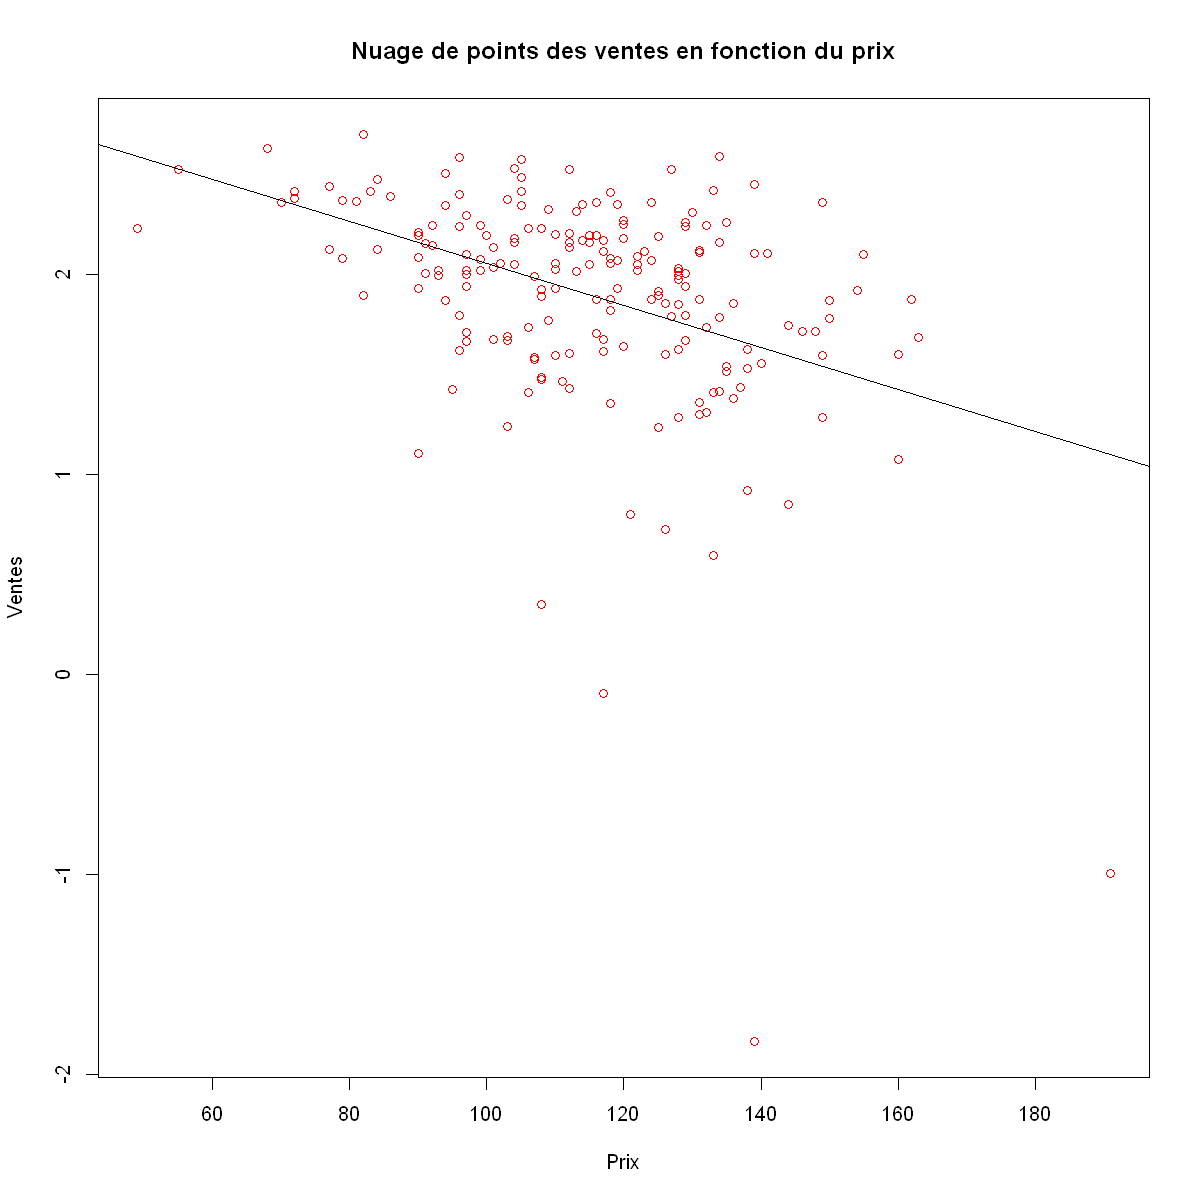

In [178]:
plot(mondata$Price, log(mondata$Sales), main="Nuage de points des ventes en fonction du prix", xlab="Prix", ylab="Ventes", col="#ff0000")
abline(linModel3)

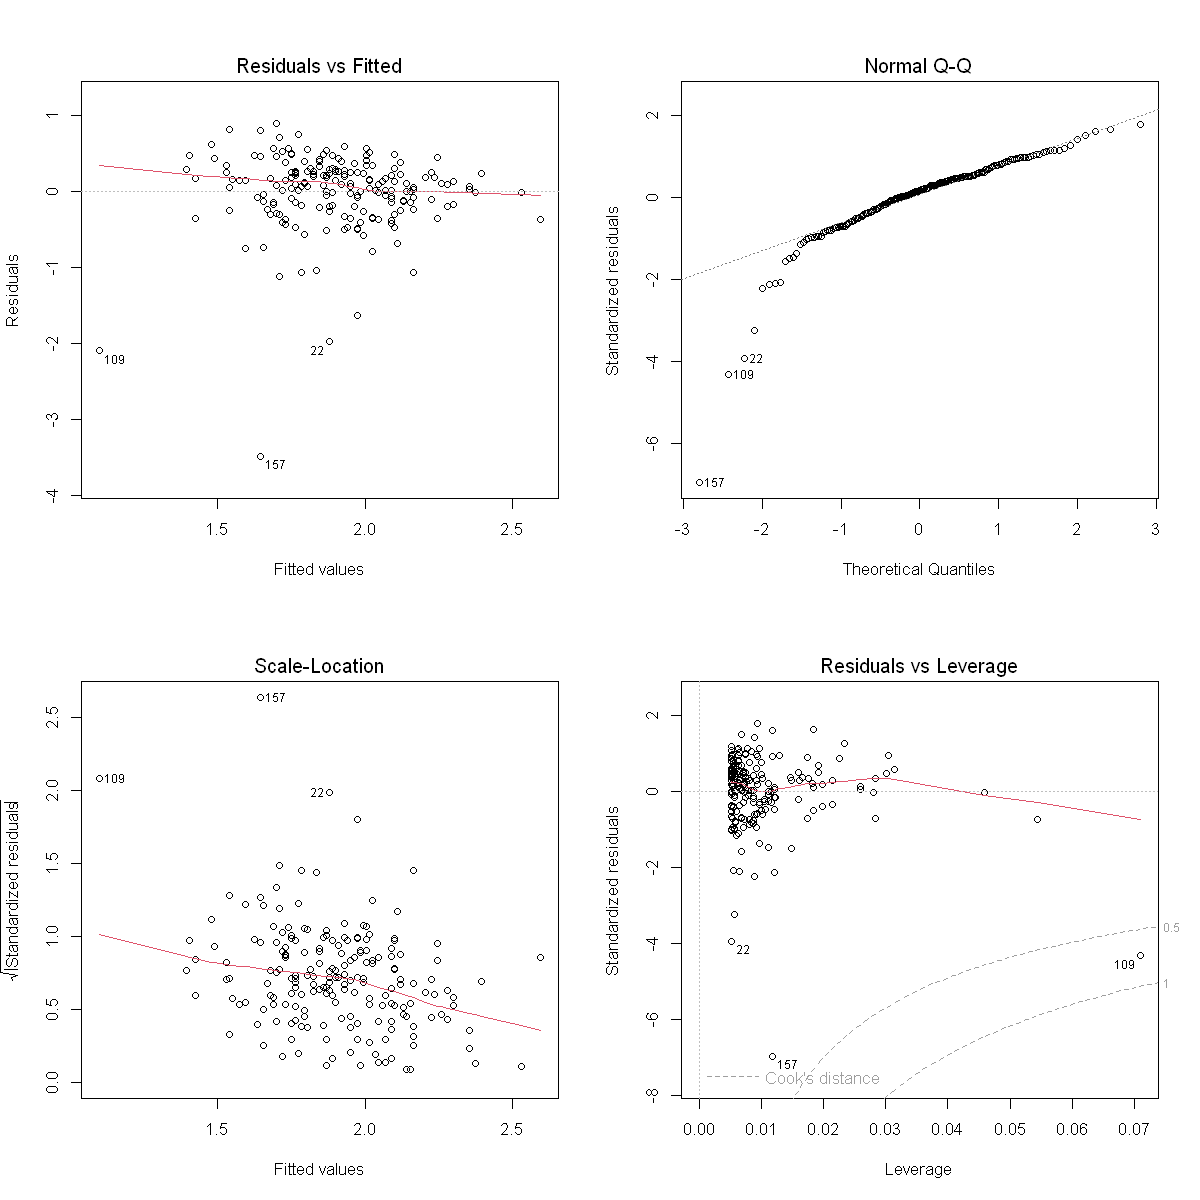

In [179]:
par(mfrow = c(2,2))
plot(linModel3)

__Test significativité du modèle 3 :__    
Hypothèse $H_0 : \beta_1 = 0$ et $H_1 : \beta_1 \neq 0$  
On a p-value = 3.172e-09 < $\alpha = 0.05$ On rejete $H_0$  
On à donc que le modèle est significatif au seuil $\alpha = 5$%

__Évaluation validité du modèle 3 :__    
Le modèle 3 est plus représentatif que le modèle 2 mais moins que le 1, car on y retrouve R² = 0.1666. On sait aussi que plus R² est proche de 1, plus la variabilité des valeurs est expliqué par le modèle. 
Cependant cette valeur est assez éloignée de 1, ce qui montre que le modèle n'est pas très valide.

__Analyse des résidus du modèle 3 :__  
- Les résidus suivent assez bien la droite de normalité, l'hypothèse de normalité est donc respectée. 
- Les résidus sont répartis de façon homogène autour de la droite.
- L'homoscédasticité des valeurs est assez bonne, on observe un léger retrésissement vers la fin de l'intervalle.
- Quelques point atipiques qui peuvent fausser le modèle. On peut les supprimer pour améliorer le modèle.

Intervale de confiance $\beta_0$ et $\beta_1$ :

In [180]:
confint(linModel3)

,2.5 %,97.5 %
(Intercept),2.71963414,3.500610737
mondata$Price,-0.01386891,-0.007183307


À 95% on a $\beta_0 \in [2.75376911, 3.331969180]$ et $\beta_1 \in [-0.01240794, -0.007497019]$.  
<br>
<br>


#### Modèle 4 --- $Y = \beta_0 + \beta_1 X_2 + \epsilon$

In [181]:
linModel4 <- lm(mondata$Sales~ mondata$Advertising)
summaryLinModel4 <- summary(linModel4)

Tableau coefficient de regression

In [182]:
summaryLinModel4$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),6.5075945,0.26827938,24.256782,1.636539e-60
mondata$Advertising,0.1409127,0.02920756,4.824527,2.842981e-06


Tableau analyse de variance 

In [183]:
anova(linModel4)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
mondata$Advertising,1,162.4394,162.439409,23.27606,2.842981e-06
Residuals,193,1346.9120,6.978819,NA,NA


Tester la signification du modèle

In [184]:
summaryLinModel4


Call:
lm(formula = mondata$Sales ~ mondata$Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6240 -1.8572  0.0351  1.5628  8.3924 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          6.50759    0.26828  24.257  < 2e-16 ***
mondata$Advertising  0.14091    0.02921   4.825 2.84e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.642 on 193 degrees of freedom
Multiple R-squared:  0.1076,	Adjusted R-squared:  0.103 
F-statistic: 23.28 on 1 and 193 DF,  p-value: 2.843e-06


Nuage de point du modèle 4

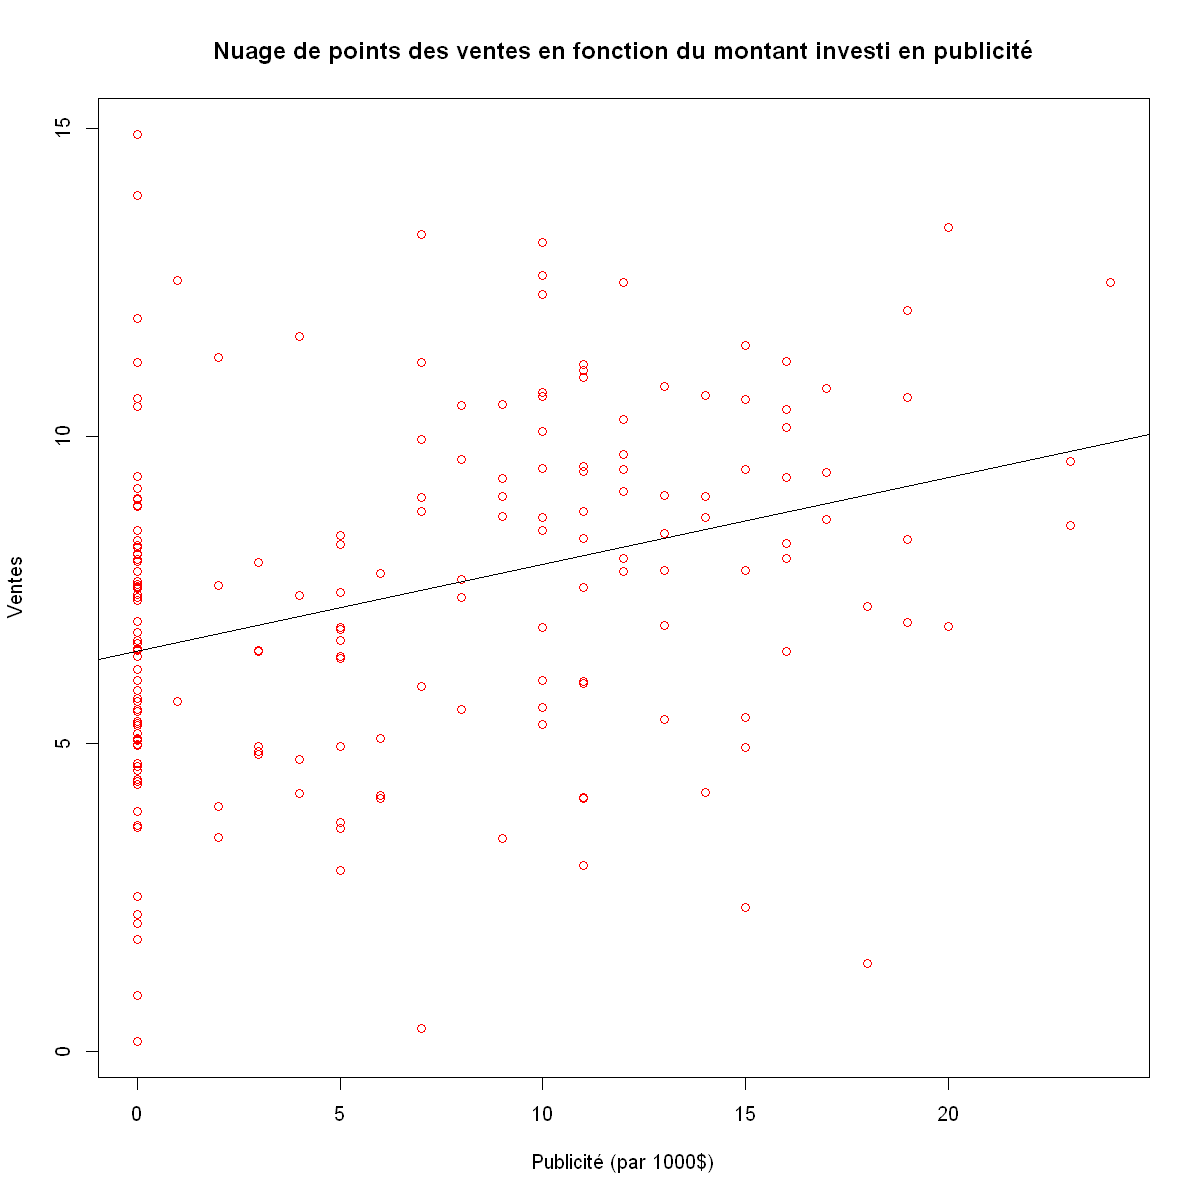

In [185]:
plot(mondata$Advertising, mondata$Sales, main="Nuage de points des ventes en fonction du montant investi en publicité", xlab="Publicité (par 1000$)", ylab="Ventes", col="#ff0000")
abline(linModel4)

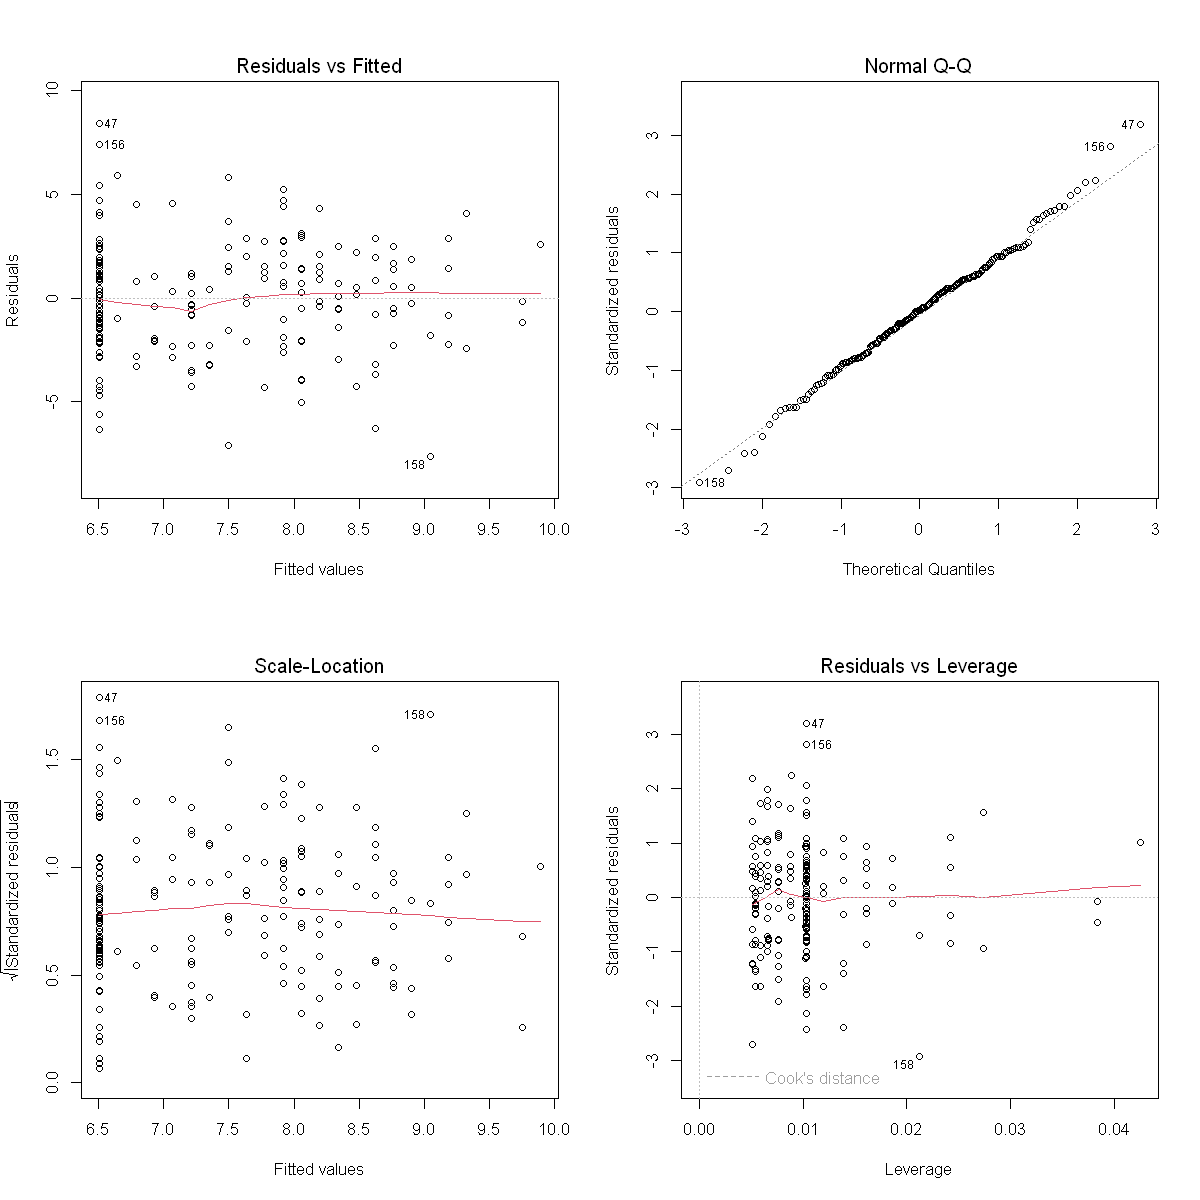

In [186]:
par(mfrow = c(2,2)) 
plot(linModel4)


__Test significativité du modèle 4 :__    
Hypothèse $H_0 : \beta_1 = 0$ et $H_1 : \beta_1 \neq 0$  
On a p-value = 2.843e-06 < $\alpha = 0.05$ On rejete $H_0$  
On à donc que le modèle est significatif au seuil $\alpha = 5$%

__Évaluation validité du modèle 4 :__    
Le modèle 4 pas très valide par rar rapport aux autres modèles, car on y retrouve R² = 0.1076.  
On sait aussi que plus R² est proche de 0, moins la variabilité des valeurs est pas expliqué par le modèle. 

__Analyse des résidus du modèle 4 :__  
- Les résidus suivent bien la droite de normalité, l'hypothèse de normalité est donc respectée. 
- Les résidus ne sont pas répartis de façon homogène autour de la droite, en effet on observe une forte concentration de points au début.
- L'homoscédasticité des valeurs est plutôt bonne.
- Deux points atipiques peuvent fausser le modèle. On pourrait les supprimer pour améliorer les résultats.

Intervale de confiance $\beta_0$ et $\beta_1$ :

In [187]:
confint(linModel4)

,2.5 %,97.5 %
(Intercept),5.97845859,7.0367304
mondata$Advertising,0.08330566,0.1985196


À 95% on a $\beta_0 \in [6.07514639, 6.9209938]$ et $\beta_1 \in [0.09092425, 0.1873456]$.  
<br>
<br>


#### Modèle 5 --- $Y = \beta_0 (8 + X_2)^{\beta_1} e^{\epsilon}$  
Équation transformée : $ln(Y) = ln(\beta_0) + \beta_1 ln(8 + X_2) + \epsilon$

In [188]:
linModel5 <- lm(log(mondata$Sales) ~ log(8 + mondata$Advertising))
summaryLinModel5 <- summary(linModel5)

Tableau coefficient de regression

In [189]:
summaryLinModel5$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.0880022,0.22274236,4.884577,2.170394e-06
log(8 + mondata$Advertising),0.3156951,0.08521537,3.704673,2.763175e-04


Tableau analyse de variance

In [190]:
anova(linModel5)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(8 + mondata$Advertising),1,3.886605,3.8866048,13.7246,0.0002763175
Residuals,193,54.654743,0.2831852,NA,NA


Tester la signification du modèle

In [191]:
summaryLinModel5


Call:
lm(formula = log(mondata$Sales) ~ log(8 + mondata$Advertising))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5771 -0.1940  0.1105  0.2922  0.9569 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.08800    0.22274   4.885 2.17e-06 ***
log(8 + mondata$Advertising)  0.31570    0.08522   3.705 0.000276 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5322 on 193 degrees of freedom
Multiple R-squared:  0.06639,	Adjusted R-squared:  0.06155 
F-statistic: 13.72 on 1 and 193 DF,  p-value: 0.0002763


Nuage de point du modèle 5

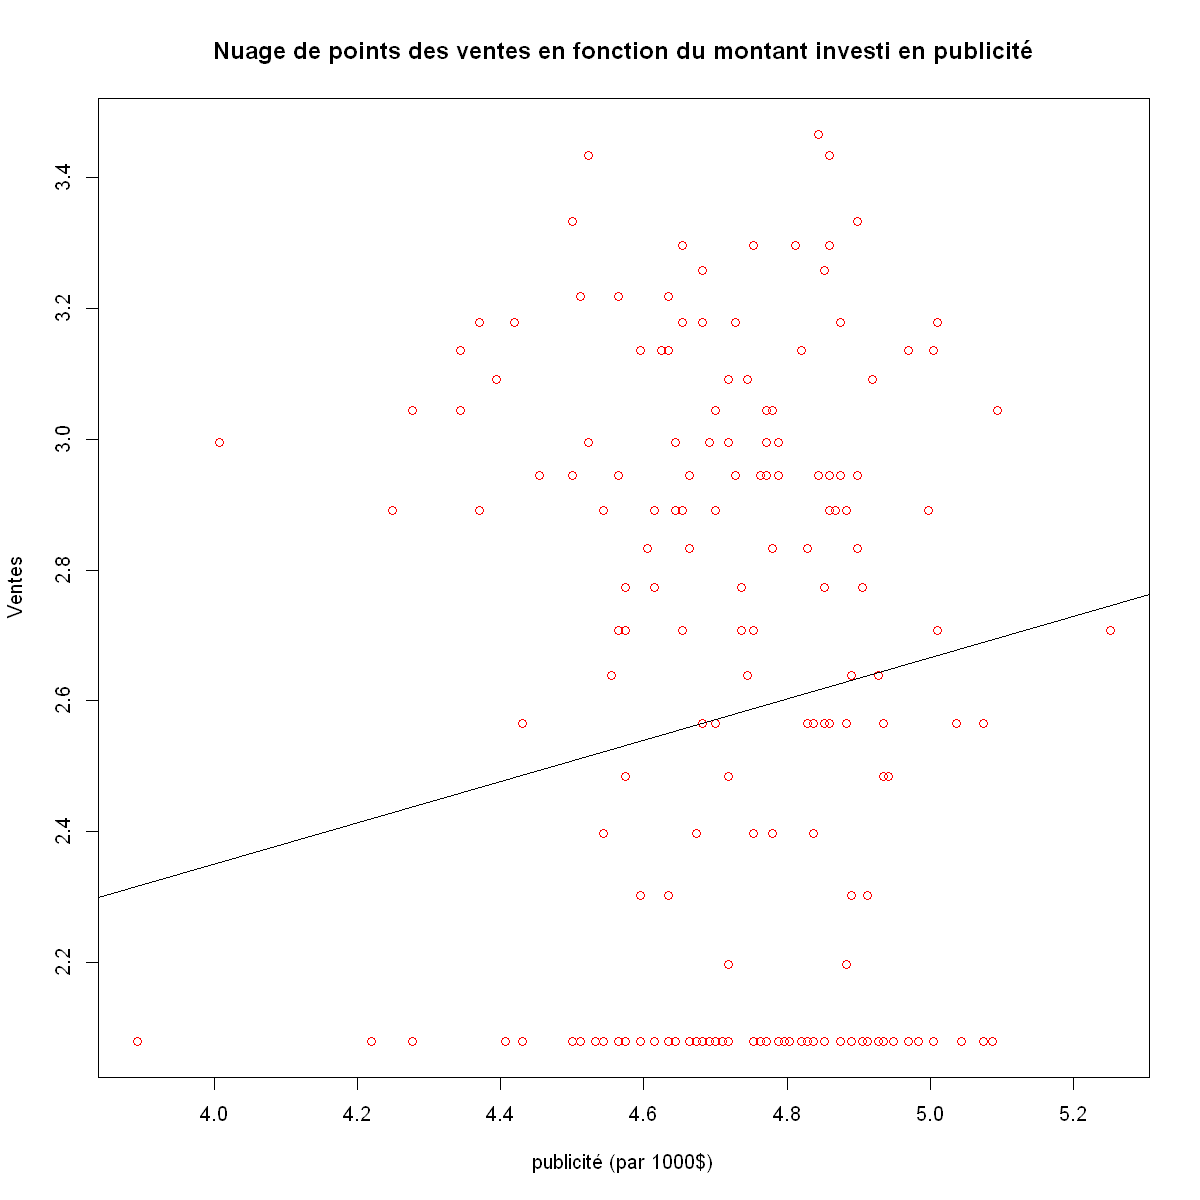

In [192]:
plot(log(mondata$Price), log(mondata$Advertising + 8), main="Nuage de points des ventes en fonction du montant investi en publicité", xlab="publicité (par 1000$)", ylab="Ventes", col="#ff0000")
abline(linModel5)

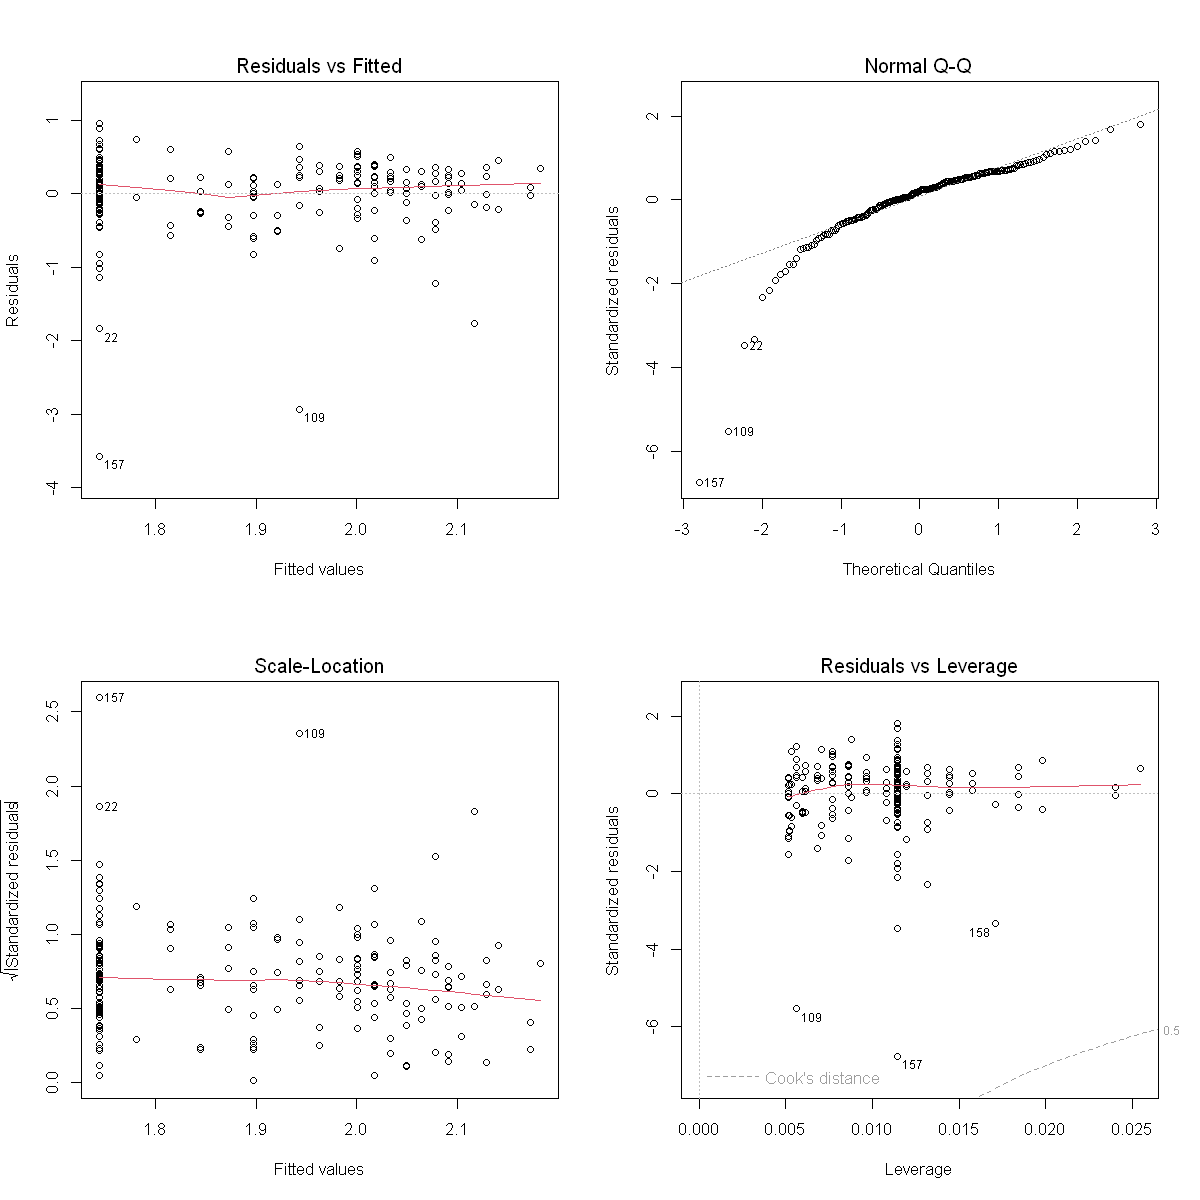

In [193]:
par(mfrow = c(2,2))
plot(linModel5)

__Test significativité du modèle 5 :__    
Hypothèse $H_0 : \beta_1 = 0$ et $H_1 : \beta_1 \neq 0$  
On a p-value = 0.0002763 < $\alpha = 0.05$ On rejete $H_0$  
On à donc que le modèle est significatif au seuil $\alpha = 5$%

__Évaluation validité du modèle 5 :__    
Le modèle 5 est peu représentatif comparativement aux autres modèles, car R² = 0.06639.  
On sait aussi que plus R² est proche de 0, moins la variabilité des valeurs est expliqué par le modèle. 

__Analyse des résidus du modèle 5 :__  
- Les résidus suivent assez bien la droite de normalité, l'hypothèse de normalité est donc respectée. 
- Les résidus ne sont pas répartis de façon homogène autour de la droite, en effet on observe une forte concentration de points au début et un peu sur la fin.
- L'homoscédasticité des valeurs est plutôt bonne mais si on peut noté un très léger rétrécissement sur la fin.
- Quelques points atipiques peuvent fausser le modèle. On pourrait les supprimer pour améliorer les résultats.

Intervale de confiance $\beta_0$ et $\beta_1$ :

In [194]:
confint(linModel5)

,2.5 %,97.5 %
(Intercept),0.6486804,1.5273240
log(8 + mondata$Advertising),0.1476221,0.4837681


À 95% on a $\beta_0 \in [0.7805855, 1.480652]$ et $\beta_1 \in [0.1638894, 0.434608]$.  
<br>
<br>


#### Modèle 6 --- $Y = \beta_0 e^{\beta_1 X_2 + \epsilon}$  
Équation transformée : $ln(Y) = ln(\beta_0) + \beta_1 X_2 + \epsilon$

In [195]:
linModel6 <- lm(log(mondata$Sales) ~ mondata$Advertising)
summaryLinModel6 <- summary(linModel6)

Tableau coefficient de regression

In [196]:
summaryLinModel6$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.75790007,0.054010327,32.547480,2.634337e-80
mondata$Advertising,0.02197562,0.005880101,3.737287,2.449595e-04


Tableau analyse de variance

In [197]:
anova(linModel6)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
mondata$Advertising,1,3.950698,3.9506985,13.96732,0.0002449595
Residuals,193,54.590649,0.2828531,NA,NA


Tester la signification du modèle

In [198]:
summaryLinModel6


Call:
lm(formula = log(mondata$Sales) ~ mondata$Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5905 -0.1936  0.1092  0.2805  0.9435 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.75790    0.05401  32.547  < 2e-16 ***
mondata$Advertising  0.02198    0.00588   3.737 0.000245 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5318 on 193 degrees of freedom
Multiple R-squared:  0.06749,	Adjusted R-squared:  0.06265 
F-statistic: 13.97 on 1 and 193 DF,  p-value: 0.000245


Nuage de point du modèle 6

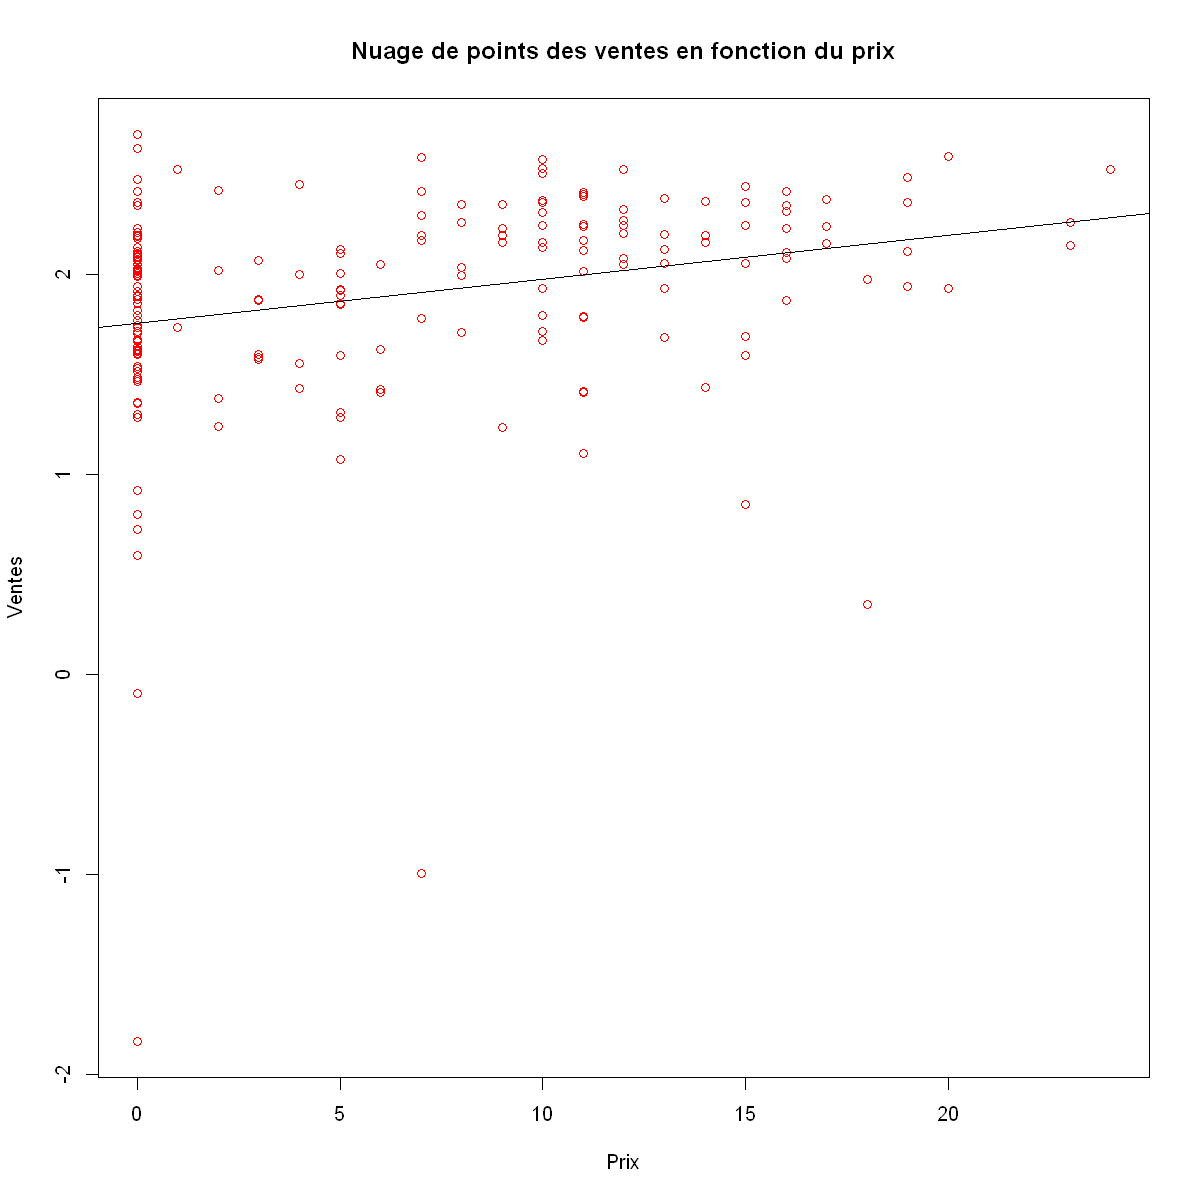

In [199]:
plot(mondata$Advertising, log(mondata$Sales), main="Nuage de points des ventes en fonction du prix", xlab="Prix", ylab="Ventes", col="#ff0000")
abline(linModel6)

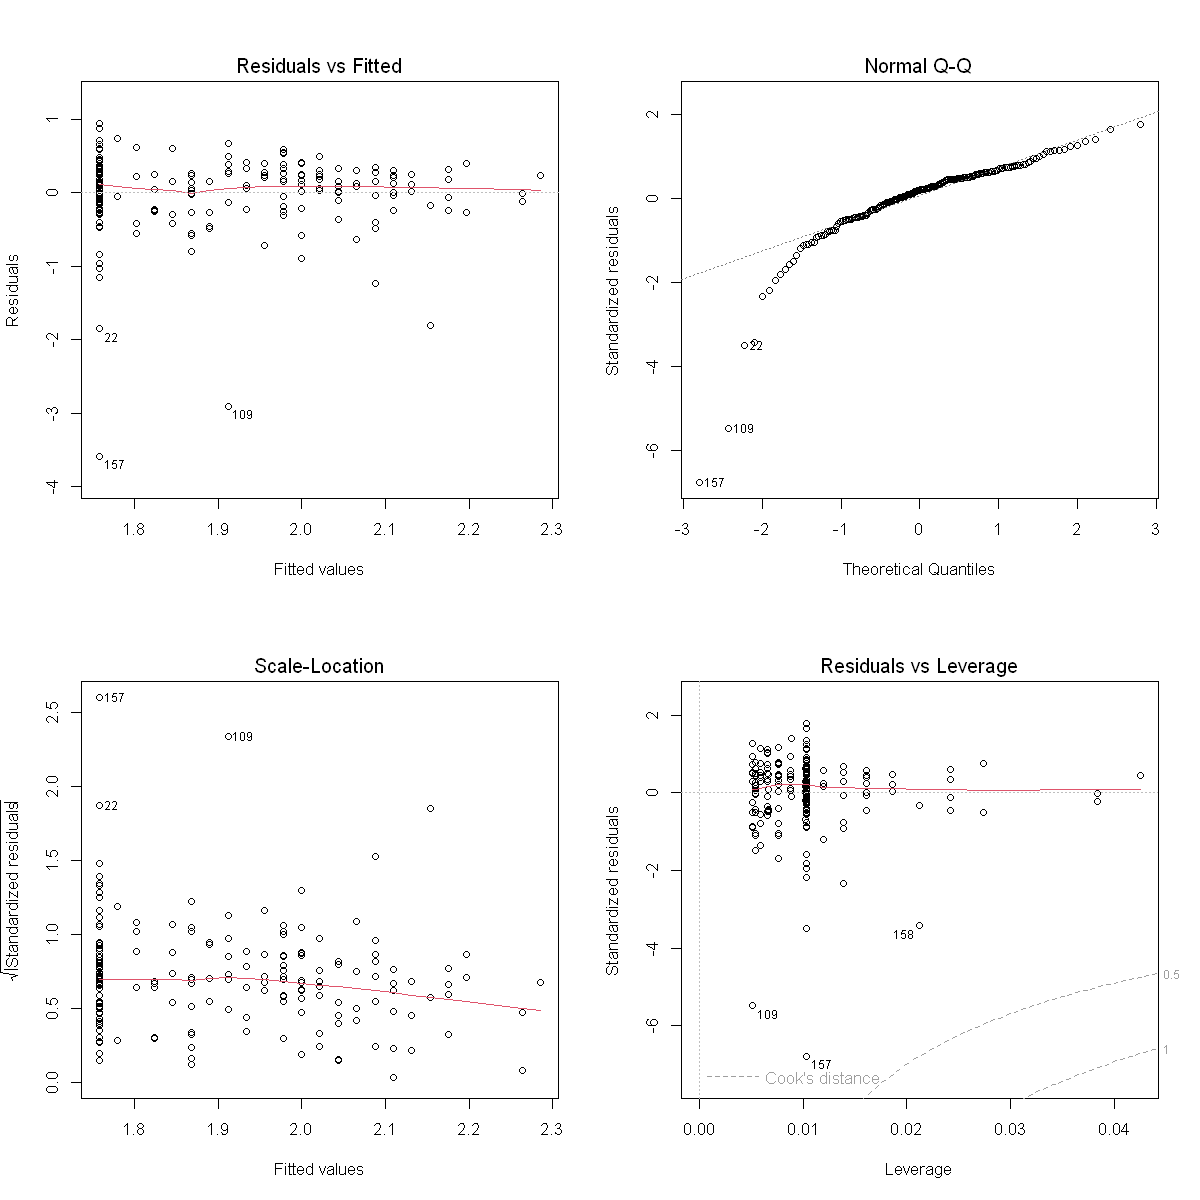

In [200]:
par(mfrow = c(2,2))
plot(linModel6)

__Test significativité du modèle 6 :__    
Hypothèse $H_0 : \beta_1 = 0$ et $H_1 : \beta_1 \neq 0$  
On a p-value = 0.000245 < $\alpha = 0.05$ On rejete $H_0$  
On à donc que le modèle est significatif au seuil $\alpha = 5$%

__Évaluation validité du modèle 6 :__    
Le modèle 6 est peu valide comparativement aux autres modèles, car R² = 0.06749.  
On sait aussi que plus R² est proche de 0, moins la variabilité des valeurs est expliqué par le modèle.

__Analyse des résidus du modèle 6 :__  
- Les résidus suivent assez bien la droite de normalité, l'hypothèse de normalité est donc respectée. 
- Les résidus ne sont pas répartis de façon homogène autour de la droite, en effet on observe une forte concentration de points au début.
- L'homoscédasticité des valeurs est plutôt bonne mais si on peut noté un très léger rétrécissement sur la fin.
- Quelques points atipiques peuvent fausser le modèle. On pourrait les supprimer pour améliorer les résultats.

Intervale de confiance $\beta_0$ et $\beta_1$ :

In [201]:
confint(linModel6)

,2.5 %,97.5 %
(Intercept),1.65137379,1.86442635
mondata$Advertising,0.01037812,0.03357313


À 95% on a $\beta_0 \in [1.67805637, 1.84386620]$ et $\beta_1 \in [0.01221427, 0.03111555]$.  
<br>
<br>


### d) Choix du meilleur modèle

Après analyse des différents modèles, on a les modèles 1 et 3 qui se destinguent des autres car ils sont tout deux significatifs et ont une valeur de R² assez élevé par rapport au autre.  
Cependant, le modèle 1 est plus représentatif que le modèle 3 car il a une valeur de R² de 0.1989, la plus élevé.  
C'est donc le modèle 1 qui represente le mieux la relation linéaire entre le prix et le nombre de ventes.

Il est tout de même important de noté qu'aucun des modèles ne peu être totalement validé, car ils ont tous une valeur de R² plutôt éloignée de 1.  
Ainsi bien que le modèle 1 soit le plus représentatif et valide, il ne permet pas de bien expliquer la variabilité des valeurs du modèle.

Équation du Modèle 1 : $Y = \beta_0 +\beta_1 X_1 + \epsilon$

On utilise la valeur de $X_1$ pour prédire la valeur des ventes $Y$.

In [209]:
predict(linModel1, data.frame(price = 118), interval = "confidence", level = 0.95)

,fit,lwr,upr
1,7.246117,6.886953,7.605282


Ainsi avec un niveau de confiance de 95%, on peut prédire que le nombre de ventes sera compris entre **6.886953 et 7.605282** milliers pour un prix de 118$.